# YouTube Addview prediction.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline



importing data


In [3]:
from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv


In [41]:
data_train= pd.read_csv('train.csv')
print(data_train.head())
data_train.shape

       vidid  adview    views likes  ... comment   published duration category
0  VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        F
1  VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        D
2   VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        C
3  VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        H
4  VID_10175       1      666     1  ...       0  2016-06-29    PT31S        D

[5 rows x 9 columns]


(14999, 9)

Assigning each category a number for Category feature.

In [42]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

data_train["category"]=data_train["category"].map(category)
data_train.head

<bound method NDFrame.head of            vidid  adview    views likes  ... comment   published duration category
0      VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        6
1      VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        4
2       VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        3
3      VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        8
4      VID_10175       1      666     1  ...       0  2016-06-29    PT31S        4
...          ...     ...      ...   ...  ...     ...         ...      ...      ...
14994     VID_31       2   525949  1137  ...      86  2015-05-18  PT6M10S        1
14995   VID_5861       1   665673  3849  ...     569  2015-10-20  PT3M56S        4
14996    VID_805       4     3479    16  ...       1  2013-08-23  PT3M13S        2
14997  VID_19843       1      963     0  ...       0  2010-10-02    PT26S        7
14998   VID_8534       1    15212    22  ...       4  201

removing character "F" present in data.

In [43]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']


converting values to integers for views,likes,comments, dislikes and adview

In [44]:
data_train['views']=pd.to_numeric(data_train['views'])
data_train['comment']=pd.to_numeric(data_train['comment'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['adview']=pd.to_numeric(data_train['adview'])

In [45]:

column_vidid=data_train['vidid']


Encoding features like Category, Duration, Vidid

In [46]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


converting time in sec for duration

In [47]:
import datetime
import time

In [48]:
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  p=['H','M','S']
  for i in y:
    if i not in p:
      mm+=i
    else:
      if (i=="H"):
        h=mm
        mm=''
      elif (i=="M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if (h==''):
    h='00'
  if (m==''):
    m='00'
  if (s==''):
    s='00'
  bp=h+':'+m+':'+s
  return bp



In [49]:
train=pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time= mp.apply(checki)

In [50]:
def fun_sec(time_string):
  h,m,s= time_string.split(':')
  return int(h)*3600+int(m)*60+int(s)
time1=time.apply(fun_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# Visualization

individual  plots

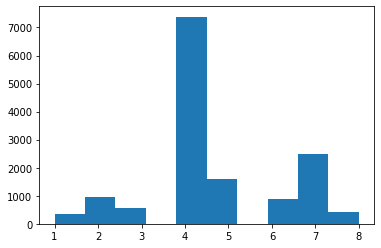

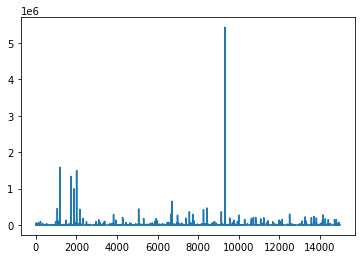

In [51]:
plt.hist(data_train['category'])
plt.show()
plt.plot(data_train['adview'])
plt.show()

Remove videos with with adview greater than 1200000 as outlier.

In [52]:
data_train=data_train[data_train['adview']<1200000]


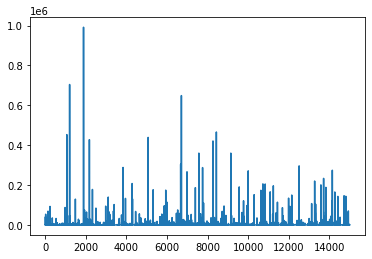

In [53]:
plt.plot(data_train['adview'])
plt.show()

heatmap

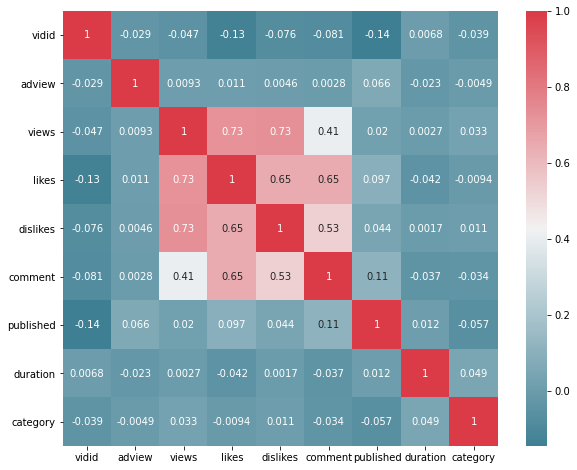

In [54]:
import seaborn as sns
f, ax= plt.subplots(figsize=(10,8))
corr= data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,
            ax=ax, annot=True)
plt.show()


Split data

In [55]:
Y_train= pd.DataFrame(data=data_train.iloc[:,1].values, columns=['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data_train, Y_train, test_size=0.1, random_state=42)
X_train.shape

(13169, 7)

normalize data

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Evalution metrics

In [58]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction= model_name.predict(X_test)
  print('MeanAbsoluteError:', metrics.mean_absolute_error(y_test, prediction))
  print('MeanSquaredError:', metrics.mean_squared_error(y_test, prediction))
  print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

TRAINING Different Models.

In [59]:
# linear Regression.
from sklearn import linear_model
linear_regression= linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

MeanAbsoluteError: 3068.078313685456
MeanSquaredError: 322256476.4061262
RootMeanSquareError: 17951.503458098607


In [60]:
# Decision Tree Regressor.
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

MeanAbsoluteError: 3488.8408469945357
MeanSquaredError: 1188156037.6728141
RootMeanSquareError: 34469.63936093347


In [61]:
# Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest= RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


MeanAbsoluteError: 2863.257950182867
MeanSquaredError: 283438980.73531455
RootMeanSquareError: 16835.646133585564


In [62]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MeanAbsoluteError: 1664.6020319150844
MeanSquaredError: 326808177.07843494
RootMeanSquareError: 18077.836626057746


Artificial NEURAL network


In [63]:
import keras
from keras.layers import  Dense
ann=keras.models.Sequential([
                             Dense(6, activation='relu',
                                   input_shape= X_train.shape[1:]),
                             Dense(6,activation='relu'),
                             Dense(1)

])

In [64]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train, epochs=100)

Epoch 1/100
412/412 [==============================] - 1s 1ms/step - loss: 425956576.3232 - mean_squared_error: 425956576.3232
Epoch 2/100
412/412 [==============================] - 0s 1ms/step - loss: 405672068.7229 - mean_squared_error: 405672068.7229
Epoch 3/100
412/412 [==============================] - 0s 1ms/step - loss: 305818005.2479 - mean_squared_error: 305818005.2479
Epoch 4/100
412/412 [==============================] - 0s 1ms/step - loss: 310686963.9814 - mean_squared_error: 310686963.9814
Epoch 5/100
412/412 [==============================] - 0s 1ms/step - loss: 273548958.6665 - mean_squared_error: 273548958.6665
Epoch 6/100
412/412 [==============================] - 0s 1ms/step - loss: 261451946.7578 - mean_squared_error: 261451946.7578
Epoch 7/100
412/412 [==============================] - 0s 1ms/step - loss: 228684882.9031 - mean_squared_error: 228684882.9031
Epoch 8/100
412/412 [==============================] - 0s 1ms/step - loss: 429166046.5488 - mean_squared_error:

In [65]:
ann.summary()
print_error(X_test,y_test, ann)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
MeanAbsoluteError: 2849.6926883633346
MeanSquaredError: 322474775.0223471
RootMeanSquareError: 17957.582660880253


Saving scikit and keras models

In [ ]:
# Saving Scikit models
import joblib
joblib.dump(supportvector_regressor, "SVR_youtubeadview.pkl")

['SVR_youtubeadview.pkl']

In [ ]:
#  Saving Keras ANN
ann.save('ann_youtubeadview.h5')

# now fetching new test data set and predicting it

In [66]:
from google.colab import files
uploaded= files.upload()

Saving test.csv to test.csv


In [72]:
new_test_data = pd.read_csv("test.csv")

In [73]:
print(new_test_data.head())
new_test_data.shape

       vidid    views likes dislikes comment   published  duration category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S        B
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S        F
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S        D
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S        G
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S        B


(8764, 8)

In [74]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

new_test_data["category"]=new_test_data["category"].map(category)
new_test_data.head

<bound method NDFrame.head of           vidid    views likes  ...   published    duration category
0      VID_1054   440238  6153  ...  2017-02-18     PT7M29S        2
1     VID_18629  1040132  8171  ...  2016-06-28     PT6M29S        6
2     VID_13967    28534    31  ...  2014-03-10    PT37M54S        4
3     VID_19442  1316715  2284  ...  2010-06-05     PT9M55S        7
4       VID_770  1893173  2519  ...  2016-09-03      PT3M8S        2
...         ...      ...   ...  ...         ...         ...      ...
8759   VID_2944   111205   471  ...  2011-04-19     PT3M14S        3
8760   VID_8195  1074457  1024  ...  2016-06-03  PT2H18M35S        4
8761  VID_18973  1891692  4606  ...  2016-06-26     PT7M14S        6
8762   VID_5849   714859  1639  ...  2016-03-23     PT3M15S        4
8763   VID_8494     5297    12  ...  2016-12-19    PT10M14S        4

[8764 rows x 8 columns]>

In [75]:
new_test_data=new_test_data[new_test_data.views!='F']
new_test_data=new_test_data[new_test_data.likes!='F']
new_test_data=new_test_data[new_test_data.dislikes!='F']
new_test_data=new_test_data[new_test_data.comment!='F']

In [76]:
new_test_data['views']=pd.to_numeric(new_test_data['views'])
new_test_data['comment']=pd.to_numeric(new_test_data['comment'])
new_test_data['likes']=pd.to_numeric(new_test_data['likes'])
new_test_data['dislikes']=pd.to_numeric(new_test_data['dislikes'])


In [78]:

column_vidid=new_test_data['vidid']


In [79]:
from sklearn.preprocessing import LabelEncoder
new_test_data['duration']=LabelEncoder().fit_transform(new_test_data['duration'])
new_test_data['vidid']=LabelEncoder().fit_transform(new_test_data['vidid'])
new_test_data['published']=LabelEncoder().fit_transform(new_test_data['published'])
new_test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [80]:
import datetime
import time

In [81]:
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  p=['H','M','S']
  for i in y:
    if i not in p:
      mm+=i
    else:
      if (i=="H"):
        h=mm
        mm=''
      elif (i=="M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if (h==''):
    h='00'
  if (m==''):
    m='00'
  if (s==''):
    s='00'
  bp=h+':'+m+':'+s
  return bp



In [82]:
test=pd.read_csv("test.csv")
mp=pd.read_csv("test.csv")["duration"]
time= mp.apply(checki)

In [83]:
def fun_sec(time_string):
  h,m,s= time_string.split(':')
  return int(h)*3600+int(m)*60+int(s)
time1=time.apply(fun_sec)
new_test_data["duration"]=time1
new_test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [85]:
new_test_data=new_test_data.drop(["vidid"],axis=1)
new_test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
new_test_data=scaler.fit_transform(new_test_data)

In [90]:
target= random_forest.predict(new_test_data)

In [91]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
# res.index = new_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["adview"]

# To download the csv file locally
from google.colab import files
res.to_csv('Prediction.csv', index=False)         
files.download('Prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>